# MCI AI and Machine Learning for beginner - Regression 2 -- Le Duc Anh -- 15/6/2025 - finished 30/6/2025

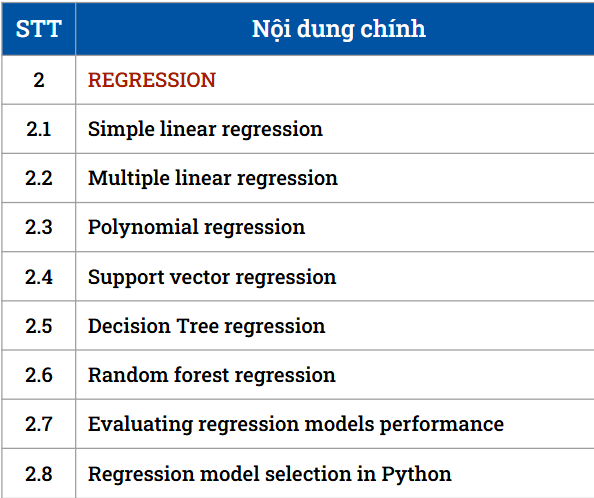

# 2.5 Decision Tree

##Decision Tree - Classification/Foundation

1. So what is decision tree, and what does it got to do with trees

<h3>for short, decision trees are popular machine learning algorithms used for classification and regression analysis</h3>

- Decision trees is a type of tree based model that represents decisions and their possible consequences as a tree-like structure. In a decision tree, which is the foundation of the neural network model, represents a decision or a test on an attribute, and the edges represents the possible outcomes of such decisions.

- The tree is constructed by splitting the data into smaller subsets based on the best attribute that partitions the data and produces the most informative splits.

- Decision trees can be used for both supervised and unsupervised learning, and have the advantages of being simple to comprehend and interpret

- They are widely used in a variety of application that needs assertive and logical decisions like finance, medicine, marketing or engineering


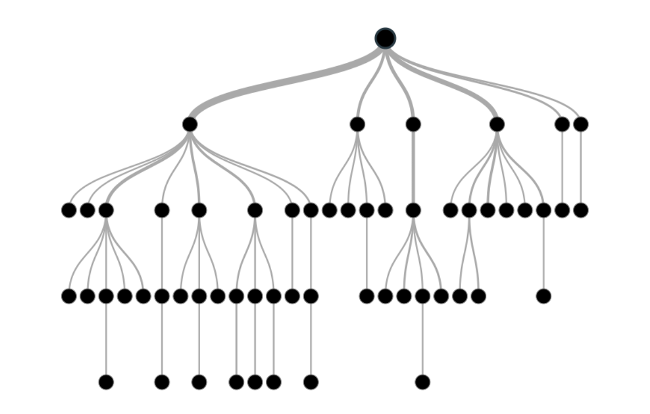

###Enthopy?

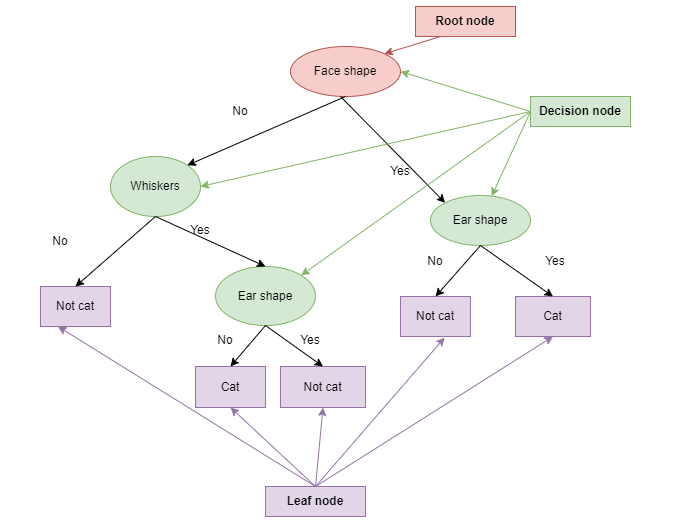

<h1>Decision Tree Terminology</h1>

- **Root Node**: the initial node at the beginning of a decision tree, where the entire population or datasets starts deviding on various features and conditions, and this root node will be determined mathematically to choose.

- **Decision Node**: are the brances Nodes stems from the Root Node, despite having the same row, but less impact. Nodes resulting from the spliting of the root nodes are known as decision nodes. These nodes represents intermediate decisions within the tree

- **Leaf Nodes**: Nodes where further splitting is not possible, which is basically the outcomes. Often considered as terminal nodes

- **Sub-Tree**: Similar to a subsection of a graph -> sub-graph, a sub-section of these tree is referred as sub-tree, represents a specific portion of the decision tree, like the dicision node has its sub-tree for instance.

- **Pruning**: the process of removing or cutting down specific nodes in a tree to prevent overfitting the model

- **Branch/Sub-Tree**: A subsection of the entire thing is reffered to as branch or sub-tree, represents a specific path of decisions and outcomes within the tree

- **Parent and Child Nodes**: In a decision tree, a node that is devided into subnodes is know as a parents node, and the sub-nodes emerging from it are referred as child nodes. The parent node represent a decision or condition, while the child nodes represnets the potential outcomes or futher decisions based on that conditions.

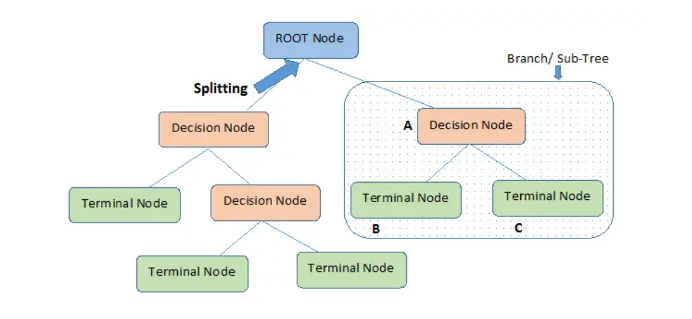

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_excel("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/weather_data.xlsx")
weather_df

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,Sunny,Hot,High,Weak,No
1,2,Cloudy,Hot,High,Weak,Yes
2,3,Sunny,Mild,Normal,Strong,Yes
3,4,Cloudy,Mild,High,Strong,Yes
4,5,Rainy,Mild,High,Strong,No
5,6,Rainy,Cool,Normal,Strong,No
6,7,Rainy,Mild,High,Weak,Yes
7,8,Sunny,Hot,High,Strong,No
8,9,Cloudy,Hot,Normal,Weak,Yes
9,10,Rainy,Mild,High,Strong,No


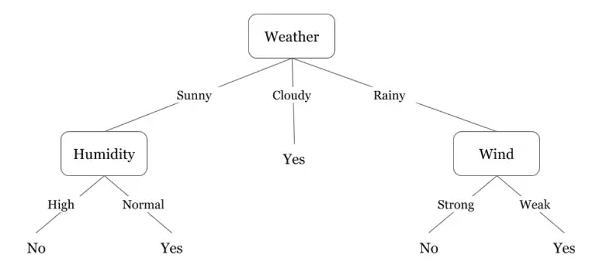

- We see that if the weather is cloudy then we must go to play. Why didn’t it split more? Why did it stop there? -> To answer this question, we need to know about few more concepts like **entropy**, **information gain**, and **Gini index**. But in simple terms, I can say here that the output for the training dataset is always yes for cloudy weather. Since there is no disorderliness here, we don’t need to split the node further.

- The goal of machine learning is to decrease uncertainty or disorders from the dataset and for this, we use these trees.

<h1> So in simple terms, how does Decision Tree Algorithm Works?</h1>

- **Starting at the Root**: The algorithm begins at the top, or the root note, representing the entire dataset.

- **Asking the best questions**: It looks for the most important feature or question that splits the data into distinct groups. This is like asking a question a a fork in the tree

- **Branching Out**: Based on the answer to that question, it divides the data into smaller subsets, creating new branches. Each branch represents a possible route through the tree

- **Repeating the process**: The algorithm continues asking questions asn splitting the data at each branch until it hit the final deduction of the "leaf nodes", thus representing the predicted outcome of the classification endeavours

<h3> 1.2 Decision Tree Learning </h3>

These can have many options of **X** to split on at each node, then we need to answer two questions:

- **Decision 1**: How to choose what feature to split on at each node?  
  **Maximize purity (or minimize impurity)**

---

<h3> 1.2.1 Entropy Function for Decision Tree </h3>

We use the **entropy function** to evaluate the purity of the splitting method.

- The higher the value of the entropy function, the **more impurity** of the splitting method.  
- The lower the value of the entropy function, the **more purity** of the splitting method.

We have a discrete variable $x$ which can be one of $n$ values $x_1, x_2, \ldots, x_n$.  
We have the probability of $x = x_i$ is $p_i$ such that: ($0 \le p_i \le 1, \sum_{i=1}^n p_i = 1$) So we have: $\mathbf{p = (p_1, p_2, \dots, p_n)}$

The entropy function is defined as:

$$
H(p) = - \sum_{i=1}^{n} p_i \log_2(p_i) \tag{1}
$$

> If $n = 2$ (means x can be one of 2 values)

**Note**: The logarithm is base 2.

-> basically, after this calculation, the smaller one will be choosen for its purity.


/tmp/ipython-input-15-1793752931.py:4: RuntimeWarning: divide by zero encountered in log2
  return - p*np.log2(p) - (1-p)*np.log2(1-p)
/tmp/ipython-input-15-1793752931.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return - p*np.log2(p) - (1-p)*np.log2(1-p)


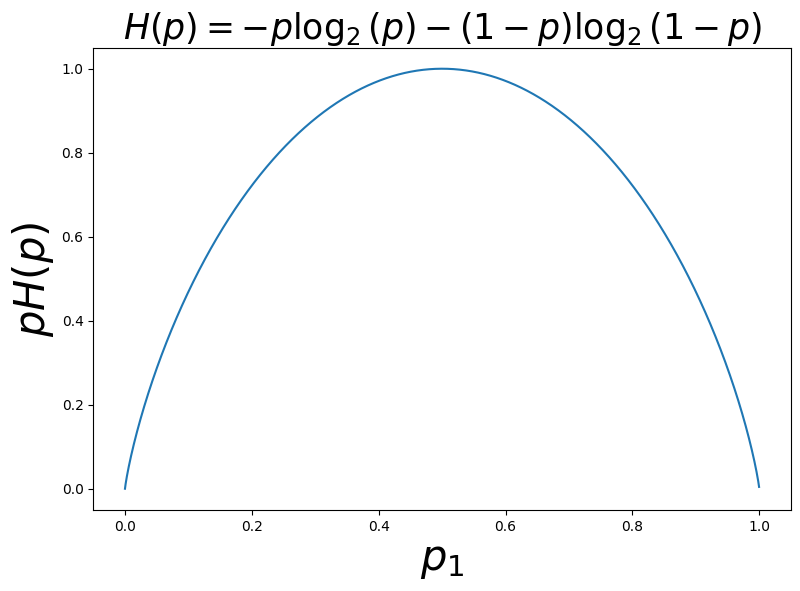

In [ ]:
def entropy (p):
    if p == 0:
        return 0
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

x = np.linspace(0,1,3000)
y = list(map(entropy,x))
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.title("$H(p) = -p\log_2(p) - (1-p)\log_2 (1-p)$",size = 25)
plt.xlabel('$p_1$',size = 30)
plt.ylabel('$pH(p)$',size = 30)
plt.show()

In [ ]:
weather_df.groupby(by=["Weather"]).agg({"Play?":list})

,Play?
Weather,
Cloudy,"[Yes, Yes, Yes]"
Rainy,"[No, No, Yes, No]"
Sunny,"[No, Yes, No]"


In [ ]:
class_1_num_br_no = 0
total_br_yes_1 = 3
H_br_no = entropy(class_1_num_br_no/total_br_yes_1)
print(H_br_no)

class_2_num_br_no = 1
total_br_no_2 = 4
H_br_no = entropy(class_2_num_br_no/total_br_no_2)
print(H_br_no)

class_3_num_br_no = 1
total_br_no_3 = 3
H_br_no = entropy(class_3_num_br_no/total_br_no_3)
print(H_br_no)

0
0.8112781244591328
0.9182958340544896


For the first one = 0, thus, in cloudy day will immediately considered as true

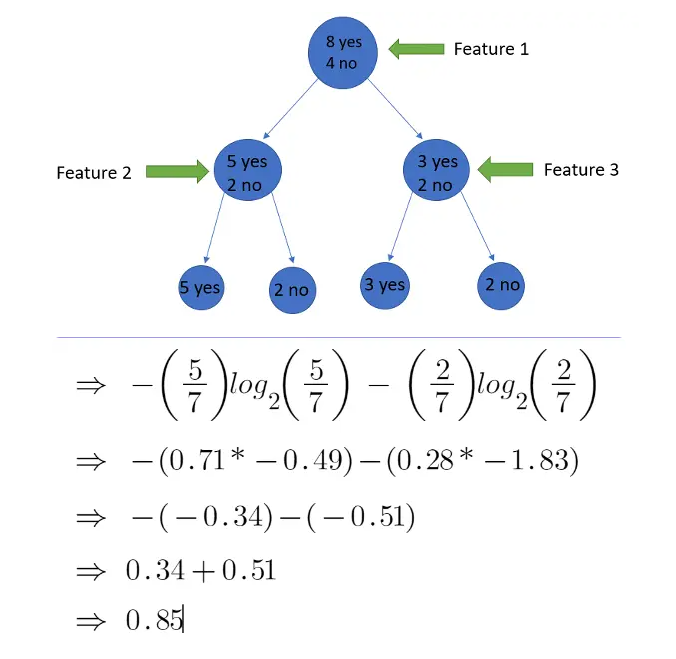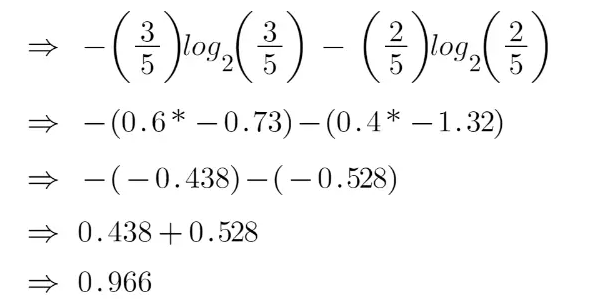

- We can clearly see from the tree itself that left node has low entropy or more purity than right node since left node has a greater number of “yes” and it is easy to decide here.

- Always remember that the higher the Entropy, the lower will be the purity and the higher will be the impurity.

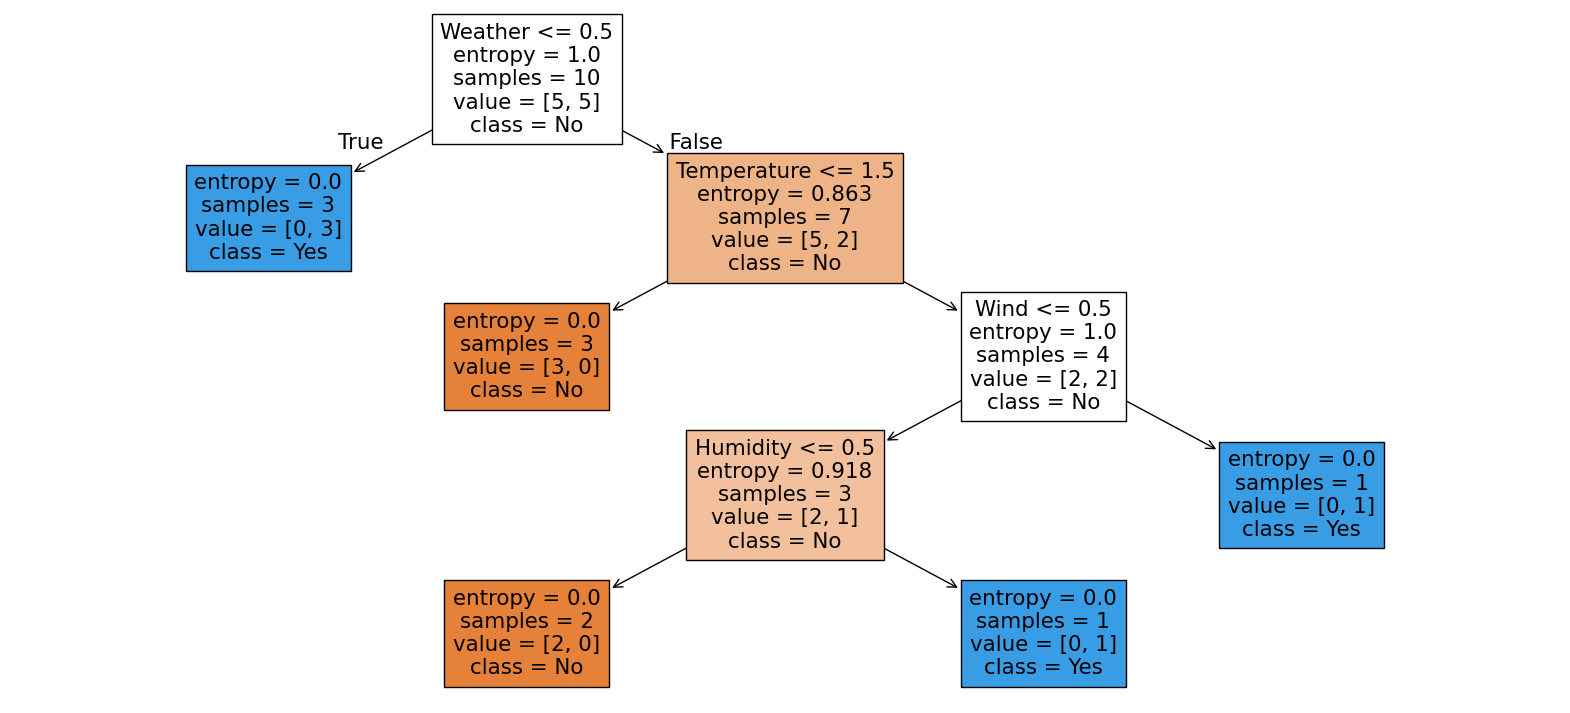

'\nlet discuss the plot_tree in detail\n\nFor short, this would obvious create this magnificient (i think) tree plot, but what all these stuff actually\nmeans?\n\nFirst of all, we have to give it the model with the integrated data inside it first\nfor the informations that it need to gain\n\nSecond of all, the feature_name parameters will be the one that gains the name of each\nnodes, or each rows from the datasets, which this have to an array like, and thus the\nx.columns will do all that\n\nThird of all, the filled, when set to True, paint nodes to indicate majority class\nfor classification (colors), extremity of values for regression, or purity of node\nfor multi-output. This basically reponsible to all the letters available in each nodes\n\nLast of all, the class_name which will dictate the output, if its = 0 then will pronounce\nthe first one, and = 1 then will pronounce the second one\n'

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare the data
x = weather_df.iloc[:, 1:-1]
y = weather_df["Play?"]

from sklearn.preprocessing import LabelEncoder
labelencoderer = LabelEncoder()
y = labelencoderer.fit_transform(y)
for i in x:
  x[i] = labelencoderer.fit_transform(x[i])

DecisionTreeClassifier_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
DecisionTreeClassifier_model.fit(x, y)

plt.figure(figsize=(20, 9))
plot_tree(decision_tree = DecisionTreeClassifier_model,
          feature_names=list(x.columns),
          filled=True,
          class_names=["No", "Yes"])
plt.show()


'''
let discuss the plot_tree in detail

For short, this would obvious create this magnificient (i think) tree plot, but what all these stuff actually
means?

First of all, we have to give it the model with the integrated data inside it first
for the informations that it need to gain

Second of all, the feature_name parameters will be the one that gains the name of each
nodes, or each rows from the datasets, which this have to an array like, and thus the
x.columns will do all that

Third of all, the filled, when set to True, paint nodes to indicate majority class
for classification (colors), extremity of values for regression, or purity of node
for multi-output. This basically reponsible to all the letters available in each nodes

Last of all, the class_name which will dictate the output, if its = 0 then will pronounce
the first one, and = 1 then will pronounce the second one
'''

####another demonstration

In [ ]:
cat_df = pd.read_excel("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/cat (1).xlsx")
cat_df

,Ear shape,Face shape,Whiskers,Cat
0,Pointy,Round,Present,1
1,Floppy,Not round,Absent,0
2,Pointy,Round,Absent,1
3,Pointy,Not round,Present,0
4,Floppy,Not round,Absent,0
5,Pointy,Round,Absent,1
6,Pointy,Round,Present,1
7,Floppy,Not round,Present,1
8,Floppy,Round,Absent,0
9,Pointy,Round,Absent,1


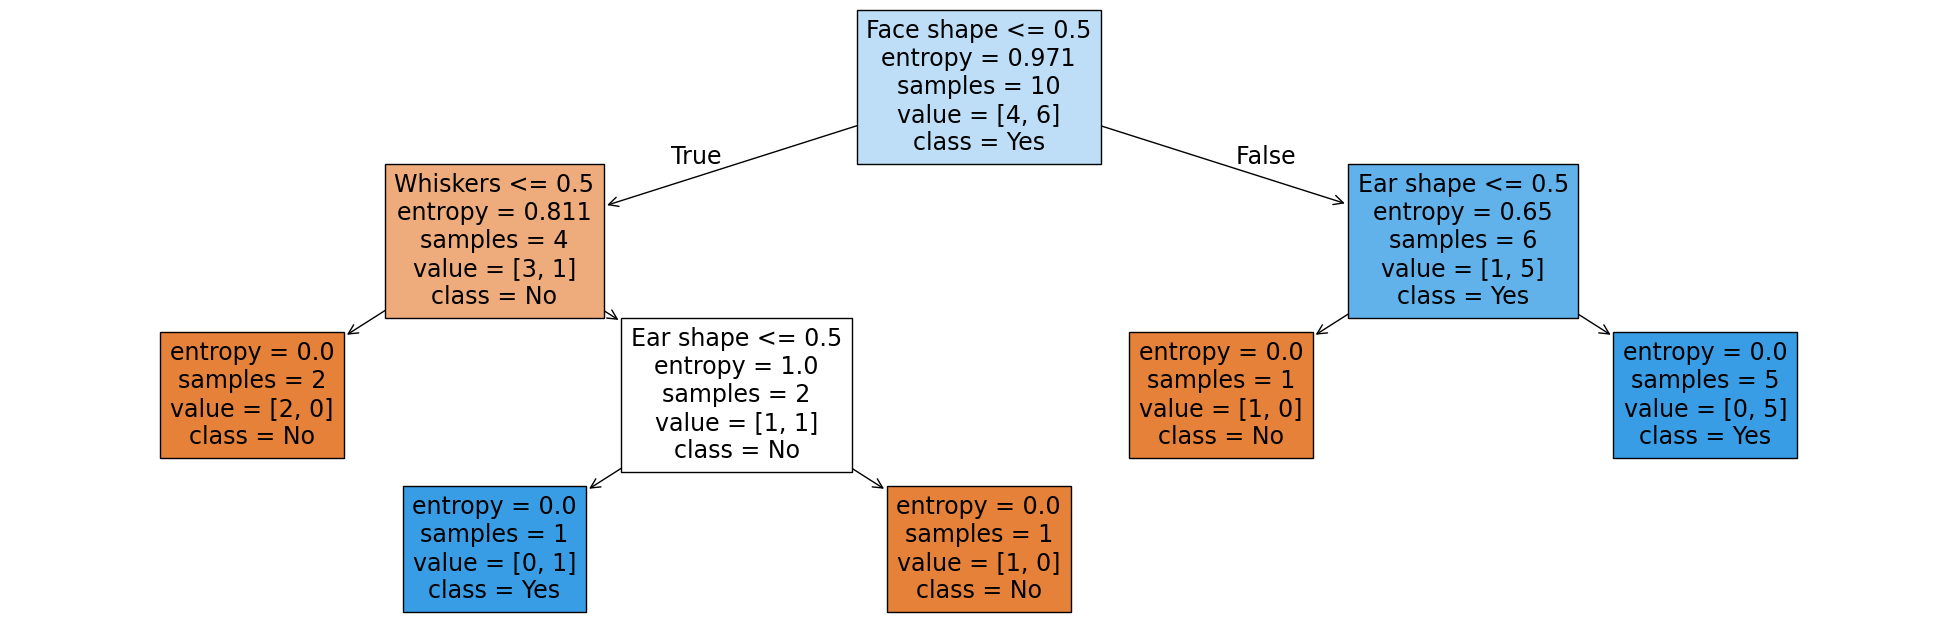

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

x=cat_df.iloc[:,:-1]
y = cat_df["Cat"]

from sklearn.preprocessing import LabelEncoder
labelencoderer = LabelEncoder()
y = labelencoderer.fit_transform(y)
for i in x:
  x[i] = labelencoderer.fit_transform(x[i])

DecisionTreeClassifier_model_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DecisionTreeClassifier_model_2.fit(x,y)
plt.figure(figsize=(25,8))
plot_tree(decision_tree = DecisionTreeClassifier_model_2,
          feature_names=list(x.columns),
          filled=True,
          class_names=["No", "Yes"])
plt.show()

####Random Numbers in Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

cat_with_weight_info = pd.read_csv("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/cat_features.csv")


'''
look at this circumstances, where the weight contains various super random ass numbers here
there is like no way we could create a decision tree model... or can we

so there is another way, is to having threholds. Given that the distribution may be like
really close, there should always be threholds, like smaller indicates to be 1 and
vice versa

but if there are little difference, then math comes in, who, will create another array
of new numbers representing threholds.

And easy enough, the function are just like: in an iteration of those random number
(given that they are unique, any iteration inside the list must be eliminated)
each number for each threholds are equals to the mean of the current value of the
iteration and its next value.

i'm bad at explaining, so let do the code real quick
'''

# Sort the unique values of the continuous feature in ascending order
sorted_weights = sorted(cat_with_weight_info['Weight (lbs.)'].unique())
sorted_weights

# Calculate the split points between consecutive values and save them into the thresholds list
thresholds = [float((sorted_weights[i] + sorted_weights[i+1])) / 2 for i in range(len(sorted_weights) - 1)]

# Print out the thresholds
print("Thresholds for the 'Weight (lbs.)' feature:", thresholds)
cat_with_weight_info

Thresholds for the 'Weight (lbs.)' feature: [7.4, 8.0, 8.600000000000001, 9.0, 9.7, 10.6, 13.0, 16.5, 19.0]


,Ear shape,Face shape,Whiskers,Weight (lbs.),Cat
0,Pointy,Round,Present,7.2,1
1,Floppy,Not round,Absent,8.8,0
2,Pointy,Round,Absent,15.0,1
3,Pointy,Not round,Present,9.2,0
4,Floppy,Not round,Absent,8.4,0
5,Pointy,Round,Absent,7.6,1
6,Pointy,Round,Present,11.0,1
7,Floppy,Not round,Present,10.2,1
8,Floppy,Round,Absent,18.0,0
9,Pointy,Round,Absent,20.0,1


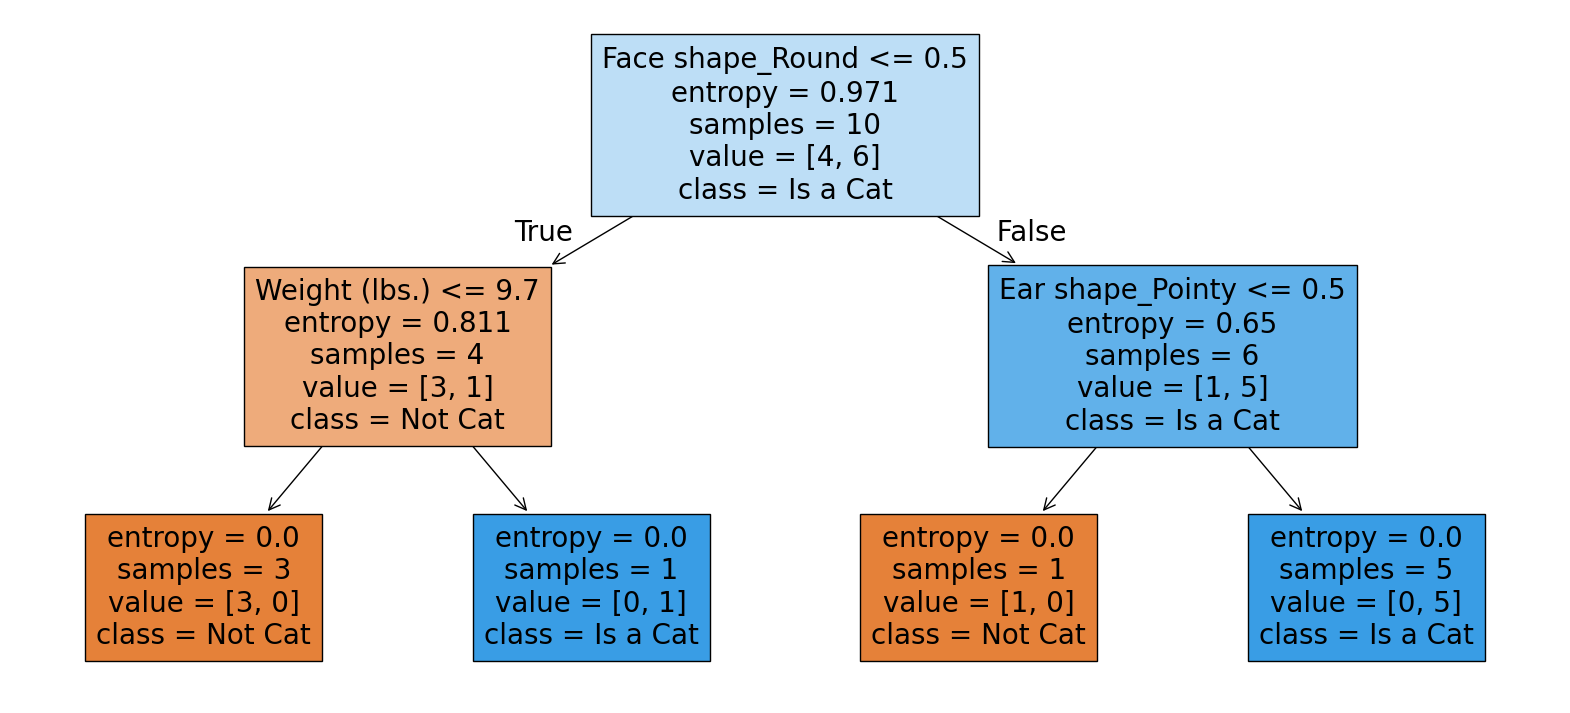

'\nas we have discussed above, after looking at the threholds, it noticed that everything\nless than 9.7 seems to be more in the NEGATIVE side as in that node, it indicate\nas in the class = Not Cat.\n'

In [ ]:
x = cat_with_weight_info.iloc[:, :-1]
y = cat_with_weight_info["Cat"]
x = pd.get_dummies(x, drop_first = True)

DecisionTreeClassifier_model_3 = DecisionTreeClassifier(criterion="entropy", random_state=42)
DecisionTreeClassifier_model_3.fit(x, y)

plt.figure(figsize = (20,9))
plot_tree(decision_tree = DecisionTreeClassifier_model_3,
          feature_names=list(x.columns),
          filled = True,
          class_names = ["Not Cat","Is a Cat"])
plt.show()
'''
as we have discussed above, after looking at the threholds, it noticed that everything
less than 9.7 seems to be more in the NEGATIVE side as in that node, it indicate
as in the class = Not Cat.
'''

###Concept of Information Gain (IG)

In a decision tree, information gain (IG) ***measures how much a particular feature helps to reduce uncertainty (or entropy) when classifying data***. It quantifies the effectiveness of splitting the dataset based on a feature.

Information Gain is the difference between the uncertainty (entropy) before and after a split. In other words, it's like saying, “Did this split help us make better predictions?” ***The higher the Information Gain, the better the split.***

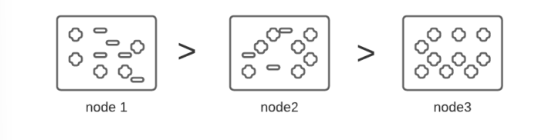

As we can see in these three nodes we have data of two classes and here in node 3 we have data for only one class and similarly, we have less data for the second class than the first class in node 2, and node 1 is balanced. By this above, we can say that ***in node three we don’t need to make any decision*** because all the instances are representing the direction of the decision in the class first side wherein in ***node 1 there are 50% chances to decide the direction of both classes***. We can say that in node 1 we are required more information than the other nodes to describe a decision. By the above, we can say the information gain in node 1 is higher.

By the above, we can say the balanced nodes or most impure nodes require more information to describe. Let’s take a look at the below image on two nodes with different impurities.

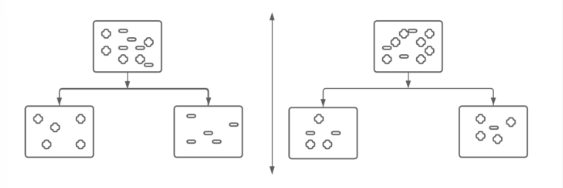




- Mathematical calculation:

We have $S$ is a set of data point. With $S$ contains $N$ data points
$$
H(S) = -\sum^{C}_{c=1}\frac{N_c}{N}log_2(\frac{N_c}{N})
$$
or this is just pure enthropy

and assume we choose attribute $x$ for this node and $x$ can create $K$ child nodes $S_1,s_2,s_3,...S_k$ with number of each child node are $m_1,m_2,...,m_k$

$$
H(x,S) = \sum^{K}_{k=1}\frac{m_k}{N}H(S_k) = -\sum^{K}_{k=1}\frac{m_k}{N}\sum^{C}_{c=1}\frac{m_k}{N}log_2(\frac{m_k}{N})
$$

and the information gain on x is calculated by:
$$
G(x,S) = H(S) - H(x,S) = -\sum^{C}_{c=1}\frac{N_c}{N}log_2(\frac{N_c}{N}) -  \sum^{K}_{k=1}\frac{m_k}{N}H(S_k)
$$

##Decision Tree - Regression

Decision Tree Regression, instead of Classification, is a method to predict continous values like prices or scores by using a tree-like structure. It works by splitting the data into smaller parts based on simple rules taken from the input features. These splits help reduce errors in prediction

Art the end of each branch, which come to the leaf nodes that we have discussed recently, the model gives a prediction usually the average value of that group

again, im bad at explaining this, let my demonstaration do the work again

shout out to https://www.geeksforgeeks.org/machine-learning/python-decision-tree-regression-using-sklearn/ for teaching me this


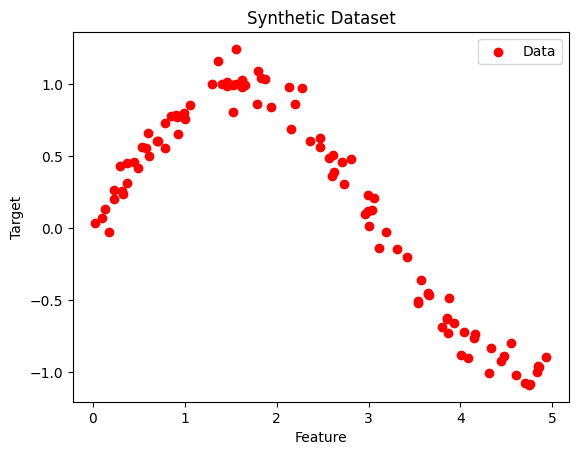

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error

np.random.seed(42)
x = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(x).ravel() + np.random.normal(0, 0.1, x.shape[0])
#the ravel thing make the np.sin() become a 1D array

plt.scatter(x, y, color='red', label='Data')
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

/tmp/ipython-input-24-2415295015.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.01)[:, np.newaxis]


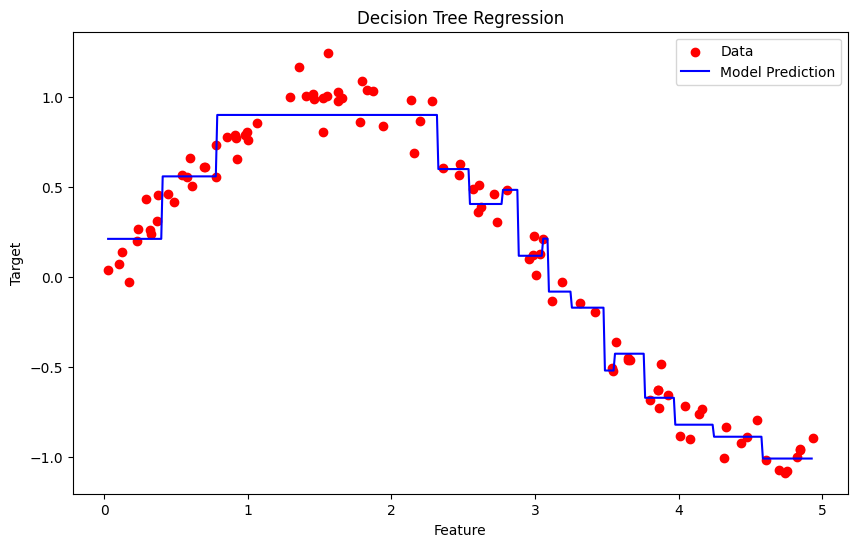

Mean Absolute Error: 0.09888368084921427
R-squared: 0.9679025510927086


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

DecisionTreeRegressor_model = DecisionTreeRegressor(max_depth = 4, random_state=42)
DecisionTreeRegressor_model.fit(x_train, y_train)
y_predict = DecisionTreeRegressor_model.predict(x_test)

mse = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

x_grid = np.arange(min(x), max(x), 0.01)[:, np.newaxis]
y_grid_pred = DecisionTreeRegressor_model.predict(x_grid)
'''
this is basically the newer data sets that is like more data points, thus increase
the accuracy of the model and the smoothing sensation of the line plot, instead of predicting
the whole given datasets.

This servers for accuracy checking and plot demonstration
'''

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(x_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

'''
as you can see from the plot, the plot doesn't seems to go by the average indicator, instead, it "fluctuating",
each drops indicate each differences, so do each climbing up, and for every single drop and climb, it basically
indicates each leaf nodes.

By that, the decision tree regression are based on this climbing and dropping foundation: based on the certain
criteria, in this case, criteria means each rows or each nodes not enthopy, we can conclude the output
'''
print(f"Mean Absolute Error: {mse}")
print(f"R-squared: {r2}")
#the model is relatively accurate

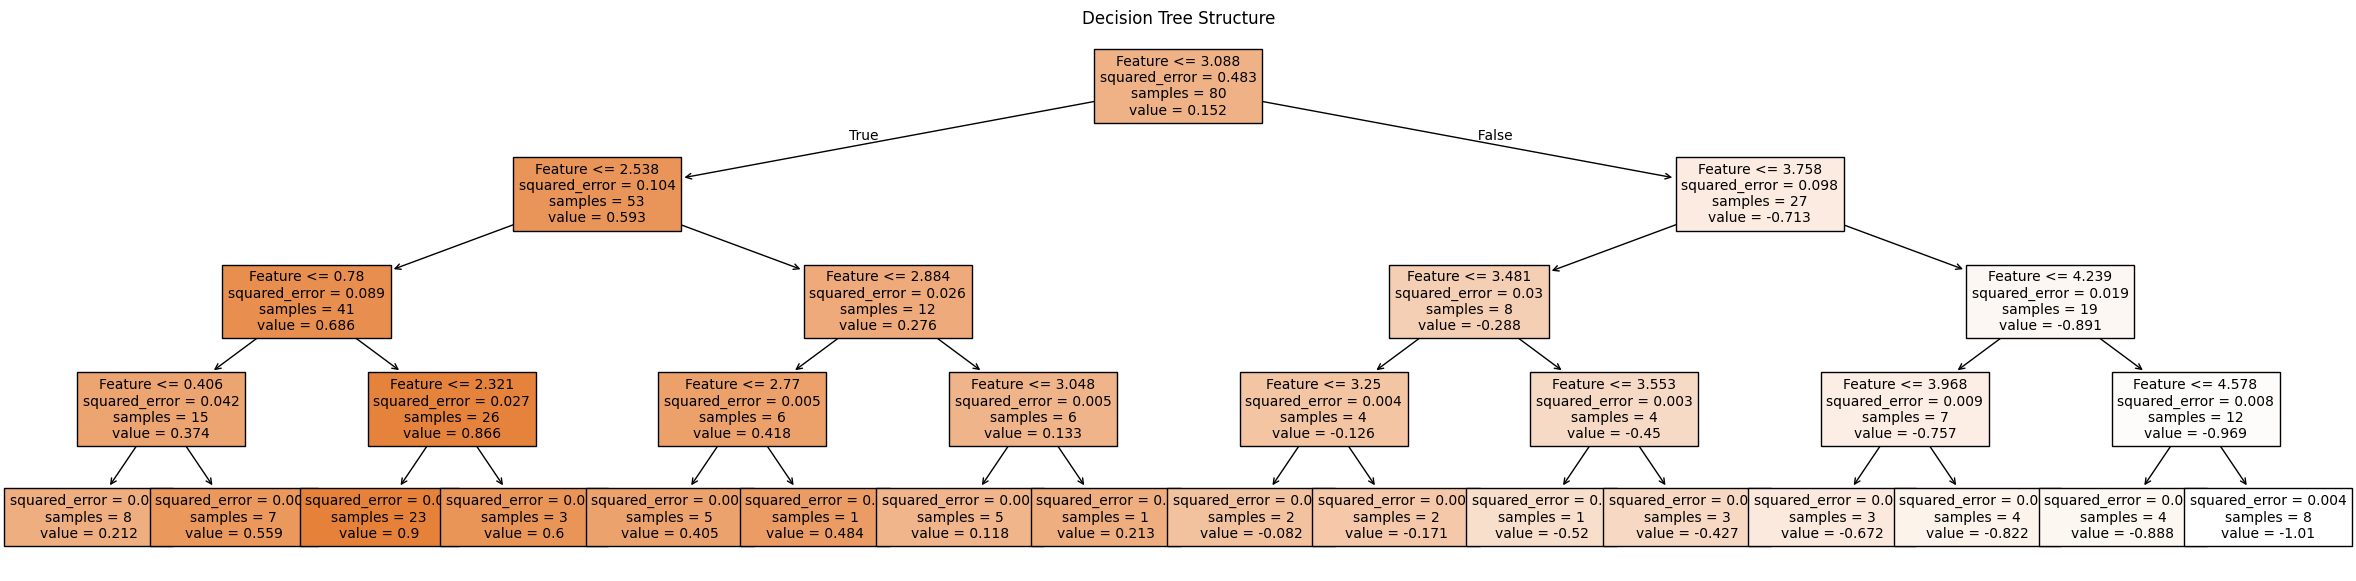

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 7))
plot_tree(
    DecisionTreeRegressor_model,
    feature_names=["Feature"],
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

####Explaining what just happend in this tree

Root Node (Top Node)
- Feature <= 3.088: the tree starts by ***splitting based on this feature value.***

- squared_error = 0.483: this is the variance of target values at this node — ***a measure of how spread out the values are.***

- samples = 80: the ***number of data points*** at this node.

- value = 0.152: the ***average value of the target*** variable at this node.

- If Feature <= 3.088, the tree follows the left branch (True). Otherwise, it goes to the right branch (False).

Furthermore, the root node is the value of the lowest x, and then after them, we got 2 different type, one is higher than this, another is lower than the root node, which divided into 2 different decision node. The value = 0.686 and value = -0.713. which represents as the average of the high/low mode. and then devide into more stuff, high/low

after do that continously, it came to the leaf nodes as each climb/fall represents at the graph up there.

####Mathematical foundation of Decision Tree Regression

1. Building the decision tree:
The model will try to divide the data into groups such that the prediction error of the model is minimized. In this case, the decision tree will attempt to partition the data into groups such that the weight of cats in each group is as similar as possible.

2. Choosing split points:
The model will iterate through the process of selecting split points for each feature similar to the classification problem, but instead of using entropy or Gini impurity, it will use criteria such as variance reduction or standard deviation reduction to optimize the regression objective.

3. Prediction:
Once the decision tree has been built, to predict the weight of a new cat, we input the features of that cat into the decision tree and take the average weight of the cats in the leaf node of the tree that the cat falls into.

The steps of the Decision Tree Regression algorithm.

- Step 1: Let's assume we have a feature matrix X and a target vector y.
- Step 2: Starting point, the tree has no nodes initially; all data resides at the root (root node).
- Step 3: The algorithm decides to choose feature t (such that the calculated value of t minimizes the deviation between predicted y and actual y).
- Step 4: The data is divided into two subsets (left branch and right branch), where one branch is x <= t, and the other branch is x > t.

-> Subset 1: instances where x ≤ t

-> Subset 2: instances where x > t

=> which has said above

---

We calculate the **variance of the y variable for each subset**, and then calculate the weighted average variance across both subsets. The variance of a dataset with n instances is defined as:

$$
variance = \sum^{n}_{n=1}\frac{(y_i-mean)^2}{(n-1)}
$$
which

$y_i$ is the y variable value for the $i^{th}$ instance

mean is the mean value of y(s) value across all instances

n is the number of instances.

---
The variance reduction for a split is defined as the difference between the variance of the parent node and the weighted average variance of the child nodes, or basically, **from the previous variance, we devided into more variance or a decision nodes into more decision nodes**:

$$
variance_{reduction} = variance_{parent} - \frac{n_1}{n}*variance_{subset_1}- \frac{n_2}{n}*variance_{subset_2}
$$

where:

- $variance_{parents}$ is the variance of the y variable in the parent node
- $n_1$ and $n_2$ are the number of instance in subset 1 and subset 2
- $n$ in the total number of instances

We want to choose the split that maximizes the variance reduction, as this means that the split results in the greatest reduction of variance in the y variable. We can compare the variance reduction of different candidate split points (i.e., different threshold values t) and select the one with the highest variance reduction as the best split.

Step 5: At each branch, the algorithm recalculates the "Mean Squared Error," which is the average of the squared differences between the actual and predicted values for each data point in that group. The process continues by recursively splitting smaller branches.
This process continues until reaching the stopping conditions or achieving the best MSE (close to 0).

# 2.6 Ensemble trees, foundation for Random Forest Regression

##Introduction to ensemble trees

Ensemble trees, also known as tree ensembles, are a class of ML algorims that combine multiple decision trees to improve accruracy and robustness of a certain prediction

The basic idea here is to train multiple decision trees independently on different subsets of the training data, and then combine their predictions in some way to make a final prediction

There are 2 main types of ensemble trees
- **Bagging (Bootstrap Aggregating)**: In bagging, we *train multiple decision tree independently on different bootstrapped subsets of the training data*. Each decision tree is trained on a randomly sampled subset of the training data with replacement, meaning that some instances may appear multiple times in the same subset and other may not appear at all. **he final prediction is made by averaging the predictions of all individual trees**

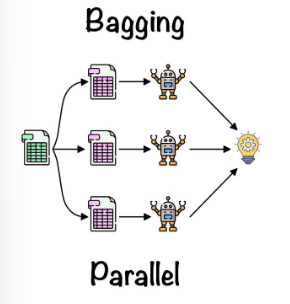


- **Boosting**: In boosting, we also train multiple decision trees, but we *do so sequentially and each tree is trained on a weighted version of the training data*. After each tree is trained, **the weights of the training instances are adjusted to give more weight to the instances that were incorrectly classified by the previous tree**. This means that the subsequent tree focuses more on the instances that the previous tree had trouble with. The final prediction is made by **summing the predictions of all the individual trees, where each tree is weighted by its accuracy**.

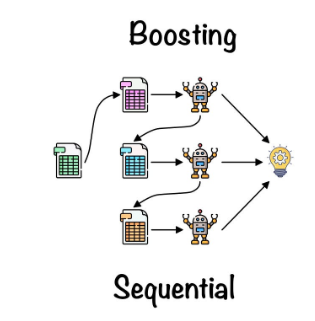



Boosting vs Bagging


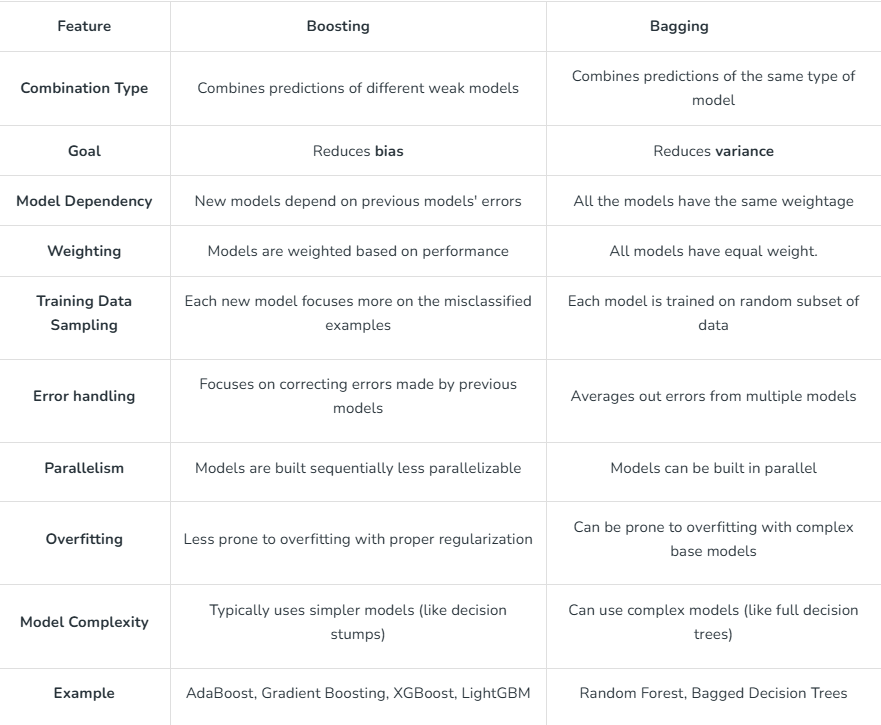

##Random Forest

The "forest" in Random Forests refers to this **collection of decision trees**. Each tree in the forest is trained on a **random subset of the original data,** using a random subset of the available X. This process is *called "bagging,*" or* bootstrap aggregating*. By training each tree on a** slightly different subset of the data and X**, the Random Forests algorithm** reduces the risk of overfitting and improves the overall accuracy of the model.**


<h3>How Random Forest Works</h3>

- **Randomly select a subset of the original data (with replacement), **which is called a bootstrap sample. This process is called "bagging" or "bootstrap aggregating." **Each tree in the forest is trained on a different bootstrap sample.**

For each tree in the forest, **randomly select a subset of X from the original feature set to use for training**. This helps to introduce more randomness and reduce correlation between the trees.

**Grow a decision tree on the bootstrap sample,** using the selected subset of X. At each node of the tree, select the feature that best splits the data based on some criterion (e.g. Gini impurity or information gain).

**Continue growing the tree until a stopping criterion is met**, such as reaching a maximum depth, reaching a minimum number of samples at a node, or achieving a minimum improvement in impurity.

Repeat steps **2-4 for each tree** in the forest.

To make a prediction for a new input, feed it through each of the decision trees in the forest, and obtain a prediction for each tree. For classification tasks, the ***final prediction is the majority vote of the predictions from all trees. For regression tasks, the final prediction is the average of the predictions from all trees.***

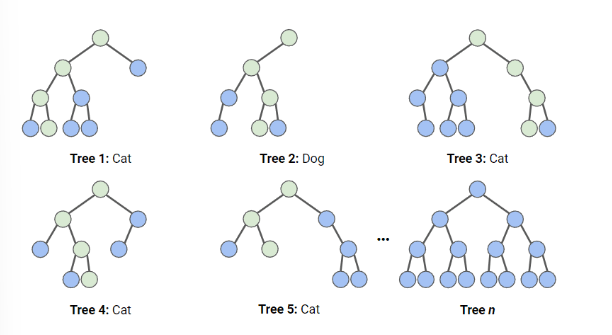

*for every n datasets stems from one main datasets

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #***************************************************************
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor #***************************************************************
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def getScores( y_test, y_predict):
    mse = mean_squared_error(y_test,y_predict)
    rmse = math.sqrt(mse)
    mae = median_absolute_error(y_test,y_predict)
    r2 = r2_score(y_test,y_predict)
    result = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2_Score": r2 }
    return result

def Auto_Bagging_MachineLearning_Model(Type_of_MachineLearning_model,
                                       x_train, x_test, y_train, y_test):
  model_name = Type_of_MachineLearning_model()
  model_name.fit(x_train,y_train)
  y_prediction = model_name.predict(x_test)
  result = f"Accuracy Calculation of {Type_of_MachineLearning_model.__name__} are: {getScores(y_test, y_prediction)}"
  return result


insurance_dataset = pd.read_csv("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/insurance.csv")
LabelEncoderer = LabelEncoder()
for i in insurance_dataset.columns:
  if insurance_dataset[i].dtype == "object":
    insurance_dataset[i] = LabelEncoderer.fit_transform(insurance_dataset[i])
insurance_dataset
x = insurance_dataset.drop(["charges"], axis=1)
y = insurance_dataset["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


print(Auto_Bagging_MachineLearning_Model(DecisionTreeRegressor,
                                         x_train, x_test, y_train, y_test))

print(Auto_Bagging_MachineLearning_Model(LinearRegression,
                                         x_train, x_test, y_train, y_test))

print(Auto_Bagging_MachineLearning_Model(RandomForestRegressor,
                                         x_train, x_test, y_train, y_test))

Accuracy Calculation of DecisionTreeRegressor are: {'MSE': 42155969.228590734, 'RMSE': 6492.762834771553, 'MAE': np.float64(478.79392499999994), 'R2_Score': 0.7284617476515449}
Accuracy Calculation of LinearRegression are: {'MSE': 33635210.431178406, 'RMSE': 5799.587091438356, 'MAE': np.float64(2685.2182160289076), 'R2_Score': 0.7833463107364539}
Accuracy Calculation of RandomForestRegressor are: {'MSE': 21198882.47612443, 'RMSE': 4604.224416351187, 'MAE': np.float64(1044.352822550015), 'R2_Score': 0.8634521372739993}


#Bonus. Boosting

as being discussed befor: Boosting is an ensemble learning technique that sequentially combines multiple weak classifiers to create a strong classifier. It is done by training a model using training data and is then evaluated. Next model is built on that which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or predefined number of iterations is reached.

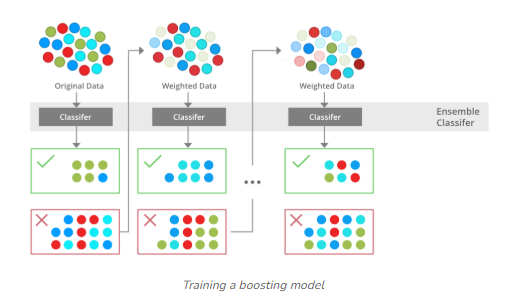

https://www.geeksforgeeks.org/machine-learning/boosting-in-machine-learning-boosting-and-adaboost/



##About Gradient Boosting

<h3>Shirkage and Model Complexity Terms</h3>

A key feature of Gradient Boosting is shrinkage which scales the contribution of each new model using learning rate (denoted as
$η$). (Like the idea of Gradient Descent)

Smaller learning rates: mean the contribution of each tree is smaller which reduces the risk of overfitting but requires more trees to achieve the same performance.

Larger learning rates: mean each tree has a more significant impact but this can lead to overfitting.

<h3> The basis of Gradient Boosting</h3>

This literally just adhere to the meaning of boosting: the ensemble consist of multiple trees that each trained to correct the errors of the previous one. It makes predictions which as used to compute the errors

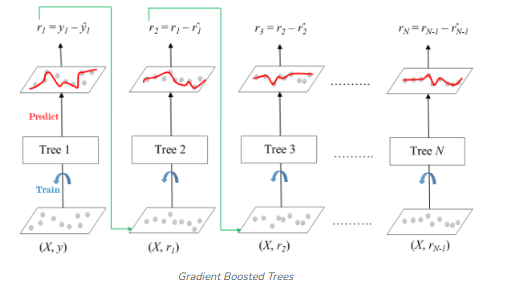


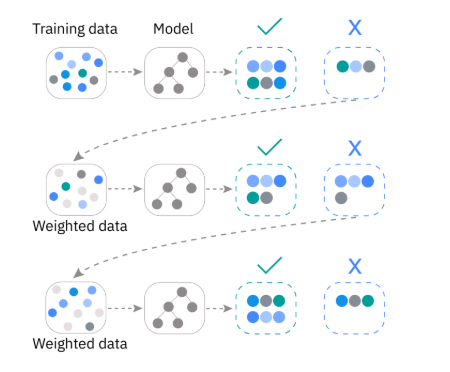

ike bagging and boosting, gradient boosting is a methodology applied on top of another machine learning algorithm. Informally, gradient boosting involves two types of models:

a "weak" machine learning model, which is typically a decision tree.
a "strong" machine learning model, which is composed of multiple weak models.
In gradient boosting, at each step, a new weak model is trained to predict the "error" of the current strong model (which is called the pseudo response). We will detail "error" later. For now, assume "error" is the difference between the prediction and a regressive label. The weak model (that is, the "error") is then added to the strong model with a negative sign to reduce the error of the strong model.

Gradient boosting is iterative. Each iteration invokes the following formula:

$$
F_{i+1} = F_i - f_i
$$

where:
- $F_1$ is the strong model at step i
- $f_1$ is the weak model at step i

This operation repeats until a stopping criterion is met, such as a maximum number of iterations or if the (strong) model begins to overfit as measured on a separate validation dataset.

- From these frames, basically, the variable with the hat represents for the error, and that error will be re-iterate into the same stuff, and inside that error may have ANOTHER ERROR, which making a cycle of fixing errors which halts until there may be little to no errors left.

<h3>Shrinkage</h3>

After each tree is trained its predictions are shrunk by multiplying them with the learning rate $η$ which ranges from 0 to 1. This prevents overfitting by ensuring each tree has a smaller impact on the final model.

or infact, the learning rate $η$ represents the fixing speed in an error. And once all trees are trained by summing the contributions of all the trees for $N$ iterations, the final predictons is given by this formula:

$$
 y_{pred} = y_1 + η.r_1 + η.r_2 + ... + η.r_N
$$
Where
$
r_1,r_2,…,r_N
$
  are the errors predicted by each tree.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor #*********************************************************************

insurance_dataset = pd.read_csv("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/insurance.csv")
LabelEncoderer = LabelEncoder()
for i in insurance_dataset.columns:
  if insurance_dataset[i].dtype == "object":
    insurance_dataset[i] = LabelEncoderer.fit_transform(insurance_dataset[i])
insurance_dataset
x = insurance_dataset.drop(["charges"], axis=1)
y = insurance_dataset["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


gdb_model = GradientBoostingRegressor()
gdb_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
print(getScores(y_test, gdb_model.predict(x_test)))

{'MSE': 18944595.15596614, 'RMSE': 4352.538932159728, 'MAE': np.float64(1479.9274138979717), 'R2_Score': 0.8779726251291786}


##XGBoost

In [ ]:
test_gdb_pred = gdb_model.predict(x_test)
print(getScores(y_test,test_gdb_pred))

{'MSE': 18944595.155966144, 'RMSE': 4352.538932159728, 'MAE': np.float64(1479.9274138979754), 'R2_Score': 0.8779726251291786}


2.3 **XGBoost**
XGboost is a very fast, scalable implementation of gradient boosting, with models using XGBoost regularly winning online data science competitions and being used at scale across different industries.


2.3.1 **XGBoost works**
Initialization: XGBoost starts by initializing the prediction model with a constant value, typically the mean of the y variable.

**Iterative training**: XGBoost trains a series of decision trees, called "boosting rounds," to improve the prediction model in an iterative manner. Each boosting round adds a new decision tree to the ensemble, with the goal of reducing the residual error of the current prediction model.

**Gradient descent**: XGBoost uses gradient descent to optimize the parameters of each decision tree, such as the splitting criterion, number of leaves, and leaf values. This allows the decision trees to fit the training data more closely and improve the accuracy of the final prediction model.

**Regularization**: XGBoost includes built-in regularization techniques, such as L1 and L2 regularization, to prevent overfitting and improve model generalization. These regularization techniques penalize the complexity of the model and encourage simpler decision trees.

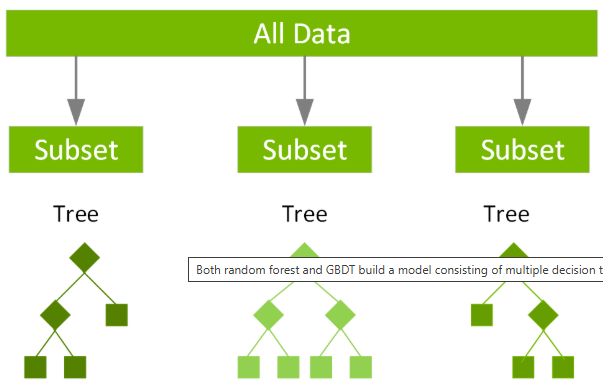


It was a result of research by Tianqi Chen, Ph.D. student at University of Washington. XGBoost is an ensemble additive model that is composed of several base learners.



** based on ChatGPT


| Feature               | **Gradient Boosting (GB)**                           | **XGBoost (Extreme Gradient Boosting)**                               |
| --------------------- | ---------------------------------------------------- | --------------------------------------------------------------------- |
| 📦 Library            | Often refers to `sklearn.ensemble.GradientBoosting*` | A separate, optimized library: `xgboost`                              |
| 🧠 Optimization       | First-order gradient descent only                    | Uses **both first- and second-order derivatives** (Taylor expansion)  |
| 🛡 Regularization     | Very limited (only shrinkage/learning rate)          | **L1 (lasso)** and **L2 (ridge)** regularization on leaf weights      |
| ⚡ Speed               | Slower (especially on large datasets)                | Much faster via **parallelization and tree pruning**                  |
| 🪵 Tree Growth        | Grows trees level-wise                               | Grows trees **leaf-wise (greedy)**, which can lead to better accuracy |
| 🧱 Missing Values     | No built-in handling                                 | Automatically learns **optimal direction** for missing values         |
| 🧰 Early Stopping     | Not built-in in **classic GB**                           | **Fully supported via evaluation metrics**                                |
| 📊 Evaluation Metrics | Limited options                                      | Rich support: AUC, logloss, rmse, error, etc.                         |
| 📈 Performance        | Good for small/medium datasets                       | Excellent scalability and accuracy for **large datasets**             |


context:

***Regularization*** in machine learning is a **technique used to prevent overfitting**, which occurs when a model learns the training data too well, including its noise and outliers, and performs poorly on new, unseen data

<h2> Mathematical Principles of XGBoost</h2>

<h2> 1. Ensemble Learning (Boosting)</h2>
XGBoost is based on <i>boosting</i>, which means it builds a strong model by combining multiple <b>weak learners</b> (usually shallow decision trees).

At each iteration, XGBoost adds a new tree to correct the mistakes of the previous trees.

---

<h2> 2. Additive Model</h2>

The prediction at step \( t \) is:

$$
\hat{y}^{(t)} = \hat{y}^{(t-1)} + f_t(x)
$$

Where:
- $ \hat{y}^{(t)} $ is the updated prediction
- $ f_t(x) $ is the tree added at iteration $ t $

The model is built stage by stage to reduce errors gradually.

this is basically a reiteration from Gradient Boosting sector for it shares the same boosting principle

---

<h2>3. Gradient Descent on Loss Function</h2>

XGBoost minimizes a <b>loss function</b> using gradient descent. The idea is:

1. Compute the gradient of the loss with respect to the prediction.
2. Fit a tree to the negative gradient (residuals).
3. Add this new tree to the ensemble.

If we use squared error:

$$
\text{Residual} = -\frac{\partial L(y, \hat{y})}{\partial \hat{y}} = y - \hat{y}
$$

=> Residuals the difference between the model's predicted and actual values

---

<h2> 4. Regularized Objective Function</h2>

=> An ***objective function*** is the goal of your machine learning model — it's the mathematical formula the model tries to minimize (or maximize) during training.

The total objective function that XGBoost minimizes is:

$$
\mathcal{L}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^{t} \Omega(f_k)
$$

Where:
- $ l $ is the loss function (e.g., squared loss, log loss)
- $ \Omega(f_k) $ is a ***regularization term*** (A regularization term is an additional component **added to a model's loss function** during training to prevent overfitting) :
  
$$
\Omega(f) = \gamma\:T + \frac{1}{2} \lambda \sum_j w_j^2
$$

This penalizes complex trees:
- $ T $: number of ***leaves/decision nodes***
- $ w_j $: leaf weights - The amount of correction that tree applies to the prediction, for data points in that leaf.
- $ \gamma, \lambda $: regularization hyperparameters -> Regularization hyperparameters **control how much the model penalizes complexity to avoid overfitting** — when your model fits training data too closely and performs poorly on new data.

---

<h2> 5. Second-Order Approximation (Taylor Expansion)</h2>

To optimize efficiently, XGBoost uses a second-order Taylor approximation of the loss:

$$
\mathcal{L}^{(t)} \approx \sum_i \left[ g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i) \right] + \Omega(f_t)
$$

Where:
- $ g_i = \frac{\partial l(y_i, \hat{y}_i)}{\partial \hat{y}_i} $ = first derivative (gradient)
- $ h_i = \frac{\partial^2 l(y_i, \hat{y}_i)}{\partial \hat{y}_i^2} $ = second derivative (hessian)

This gives more accurate updates than standard gradient descent.

---

<h2> 6. Tree Construction (Greedy Algorithm)</h2>

XGBoost builds trees using a greedy algorithm that selects splits to <b>maximize gain</b>.

The gain of a split is:

$$
\text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right] - \gamma
$$

Where:
- $ G_L, H_L $: sum of gradients and hessians on the left split
- $ G_R, H_R $: on the right split
- $ \lambda, \gamma $: regularization terms

---

<h2>🧪 7. Summary Table (XGBoost Core Ideas)</h2>

| Concept                | Mathematical Expression / Idea                            |
|------------------------|------------------------------------------------------------|
| Additive boosting      | $$ \hat{y}^{(t)} = \hat{y}^{(t-1)} + f_t(x) $$              |
| Gradient step          | Fit tree to $$ -\frac{\partial L}{\partial \hat{y}} $$     |
| Regularization         | $$ \Omega(f) = \gamma T + \frac{1}{2} \lambda \sum w_j^2 $$ |
| Taylor expansion       | Approximate loss using gradients and hessians              |
| Split criterion        | Use gain formula based on gradient/hessian                 |

---

<h2> Final Thoughts</h2>

XGBoost is powerful because:
- It uses <b>both gradient and hessian</b> for optimization (like Newton's method).
- It includes <b>regularization</b> to prevent overfitting.
- It builds <b>trees greedily</b> using a smart gain formula.

It’s fast, accurate, and widely used in Kaggle competitions and industry.


In [ ]:
import xgboost as xgb

insurance_dataset = pd.read_csv("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/insurance.csv")
LabelEncoderer = LabelEncoder()
for i in insurance_dataset.columns:
  if insurance_dataset[i].dtype == "object":
    insurance_dataset[i] = LabelEncoderer.fit_transform(insurance_dataset[i])
insurance_dataset
x = insurance_dataset.drop(["charges"], axis=1)
y = insurance_dataset["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
test_xgb_pred =xgb_model.predict(x_test)
print(getScores(y_test,test_xgb_pred))

{'MSE': 23261243.811358407, 'RMSE': 4822.991168492682, 'MAE': np.float64(1351.4291140625005), 'R2_Score': 0.8501678977480663}


# 2.7 Evaluate Regression Model Performance

Evaluation metrics for regression are essential for a**ssessing the performance of regression models specifically**. These metrics help in measuring how well a regression model is able to predict continuous outcomes. Common regression evaluation metrics for regression include

- Mean Absolute Error (MAE)

-  Mean Squared Error (MSE)

- Symmetric mean absolute percentage error (sMAPE)

- Root Mean Squared Error (RMSE)
  
- R-squared (Coefficient of Determination)

- mean bias error (MBE).
  
- and Mean Absolute Percentage Error (MAPE)

By utilizing these regression-specific metrics, data scientists and machine learning engineers can **evaluate the accuracy and effectiveness of their metrics for regression models in making predictions**. Regression is also one type of supervised machine learning. In this tutorial, we will discuss various metrics for evaluating regression models and how to implement them using the sci-kit-learn library.

In [ ]:
##here is a certain dataset as an example

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

startups_df = pd.read_csv("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/50_Startups.csv")

LabelEncoderer_Model_Example = LabelEncoder()

for i in startups_df.columns:
  if startups_df[i].dtype == "object":
    startups_df[i] = LabelEncoderer_Model_Example.fit_transform(startups_df[i])

startups_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

x = startups_df.drop(["Profit"], axis=1)
y = startups_df["Profit"]
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2, random_state=42)

XGB_modeling_1 = xgb.XGBRegressor()
XGB_modeling_1.fit(x_train, y_train)

XGB_predicting = XGB_modeling_1.predict(x_test)

print("predicting stuffs", XGB_predicting, "real testing data\n", y_test)

predicting stuffs [125757.78   79436.7    98814.49   43040.566 133134.45   26074.123
 109426.68   99632.38   99632.19  112432.66 ] real testing data
 13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64


## Mean Absolute Error (<code>MAE</code>):  
  $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i| $$

mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon

So basically, Imagine you have a box of toy cars. You guess there are 5 cars inside, but when you open the box, you see 7 cars. The difference between your guess and the real number is 2.

Now, if you guess 6 cars next time, but there are actually 4 cars, the difference is 2 again.

The Mean Absolute Error (MAE) is like taking all those differences between your guesses and the real numbers, ignoring if they are too big or too small, and then finding the **average difference**.

So, it tells you on average how far off your guesses are from the real answers. The smaller the number, the better your guesses are!

In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_error_execution(y_predicting, y_testing):
  return mean_absolute_error(y_predicting, y_testing)

mean_absolute_error_execution(XGB_predicting, y_test)

7450.425523437501

## Mean Squared Error (<code>MSE</code>):  
  $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

Okay! Imagine again you’re guessing how many toy cars are in a box.

One time you guess 5 cars, but there are 7 — that’s a difference of 2.

Another time you guess 6 cars, but there are 4 — difference of 2 again.

Now, instead of just looking at the difference like before, Mean Squared Error (MSE) makes those differences even bigger by multiplying the difference by itself (called “squaring”).

So:

Difference 2 becomes 2 × 2 = 4

Difference 2 becomes 4 again

Then, it finds the average of those bigger numbers.

Why? Because when you square the difference, big mistakes get punished more than small ones. It’s like saying “Oops! That mistake was really big!”

**So MSE tells you, on average, how big your mistakes are — but it makes big mistakes feel extra important.**

nevertheless, Mean Squared Error (MSE) is more than just a way to say “Oops, that’s a big mistake.” It actually helps a lot in real-world tasks, especially in teaching computers to learn and improve.
- Because MSE squares the errors, it pushes the computer harder to fix big mistakes rather than small ones.
- The “squaring” makes MSE smooth and easy to work with when doing math to update the model.
- MSE punishes large mistakes more than small ones, which is useful when big errors are really bad
- In statistics, economics, weather forecasting, and many sciences, MSE is a standard way to check how close predictions are to reality.

In [ ]:
from sklearn.metrics import mean_squared_error

def mean_squared_error_execution(y_predicting, y_testing):
  return mean_squared_error(y_predicting, y_testing)

mean_squared_error_execution(XGB_predicting, y_test)

89412571.44249564

## Symmetric Mean Absolute Percentage Error (<code>sMAPE</code>):  
  $$ \text{sMAPE} = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|)/2} \times 100\% $$

You’re playing a game. You look at a jar and guess how many candies are inside.

Sometimes you guess too low, sometimes too high.

Now, we want a fair way to see how good your guesses are — even when the number of candies is really big or really small.

<h3> This is used when the error are too big </h3>

Well, if one jar has 100 candies and you're off by 10, that's not bad.

But if a jar has only 10 candies and you're off by 10 — that's a huge mistake!

BASICALLY...

SMAPE is like saying:

"Let’s look at how wrong I was, as a percentage of the real and guessed values together."

It works like this:

It **checks how far off your guess was** (that’s the absolute error).

Then it divides that by the average of your guess and the real number.

Finally, it turns it into a percentage, and averages it across all your guesses.

<h2>In Short</h2>

sMAPE tells you how bad your guess was as a percent.

It’s fair to both big and small numbers.

It’s symmetric, so it doesn’t punish overguessing or underguessing differently.

It helps us compare how good models or people are at guessing — especially when numbers vary a lot!

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
def symmetric_mean_absolute_percentage_error_execution(y_predicting, y_testing):
  return mean_absolute_percentage_error(y_predicting, y_testing)

symmetric_mean_absolute_percentage_error_execution(XGB_predicting, y_test)*100

12.59944179882442

##Root Mean Squared Error (<code>RMSE</code>):  
  $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

You’re guessing how many apples are in different boxes. Sometimes you're close, sometimes you're way off.

You make a guess for each box.

We find how wrong you were for each guess (like: real = 10, guess = 8 → you were off by 2).

Then we square each mistake (2 becomes 4, big mistakes grow even bigger!).

After that, we average all those squared mistakes.

Finally, we take the square root — like undoing the square — so the number makes more sense again.

Let’s say your squared errors are:
4, 9, 1 → average is (4+9+1)/3 = 4.67
Then √4.67 ≈ 2.16

So your average mistake is about 2.16 apples.

##R-squared (Coefficient of Determination):  
  $$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

You're playing a dart game. Your goal is to hit the bullseye (🎯), but you throw lots of darts.

Now imagine your friend also plays — and we want to know who’s better at hitting the middle.

That’s where R-squared comes in. It tells us:

How good are your guesses (or darts) compared to just guessing the average every time?

 <h2> Story Time: Guessing Teddy Bears</h2>
Let’s say we’re guessing how many teddy bears are in different boxes.

If you always guess the average number of teddy bears — you’d be right sometimes, but not great.

If you use a smart way (like a model) to guess better, we want to measure how much better that is than just always guessing the average.

<h2> What Does R-squared Mean?</h2>

R-squared is a number between 0 and 1 (sometimes even negative! 😱).


```
If R-squared = 1, your guesses are perfect!

If R-squared = 0, your guesses are no better than guessing the average every time.

If R-squared < 0, your guesses are worse than just guessing randomly!
```



##Mean Bias Error (<code>MBE</code>):  
  $$ \text{MBE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i) $$

Mean Bias Error (MBE) is a metric that tells you whether your predictions are generally too high or too low — it shows the average direction of the error.

What does it tell you?

```
MBE > 0: Your model overpredicts on average.

MBE < 0: Your model underpredicts on average.

MBE = 0: Your model’s predictions are balanced — no overall bias.
```

Unlike MAE (Mean Absolute Error) or RMSE, MBE can cancel out positive and negative errors.

That means you might have big errors, but if you overpredict as much as you underpredict, the MBE could still be 0.

##Mean Absolute Percentage Error (<codem>MAPE</code>):  
  $$ \text{MAPE} = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\% $$

MAPE tells you how wrong your predictions are, as a percentage of the actual values.

It answers this question:

“On average, how far off were my predictions, in percent?

What Does It Mean?
Let’s say your MAPE is 10%. That means:

On average, your predictions were 10% off from the actual values.

If MAPE is:



```
0% → Perfect prediction

20% → Your predictions are off by 20% on average
```



Limitations
Cannot handle zero values in the actuals (division by zero).

Overly sensitive to small actual values — if the actual is 1 and you predict 2, that's 100% error.

For that reason, alternatives like ***SMAPE or MASE*** are sometimes preferred.

# 2.8 Regression Model Selection in Python

##Usage case for each regression model

| Regression Type                  | Use When…                                                                         |
| -------------------------------- | --------------------------------------------------------------------------------- |
| **Simple Linear Regression**     | One input feature, linear relationship                                            |
| **Multiple Linear Regression**   | Multiple input features, linear relationship                                      |
| **Polynomial Regression**        | Relationship is nonlinear but continuous                                          |
| **Support Vector Regression**    | Data is small, high-dimensional, or non-linear                                    |
| **Decision Tree Regression**     | Data has complex, non-linear relationships with potential thresholds              |
| **Random Forest Regression**     | Similar to above, but with more robustness and less overfitting                   |
| **Gradient Boosting Regression** | When you want more accuracy than random forest, and are okay with slower training |
| **XGBoost Regression**           | Large datasets, need regularization, speed, or top competition performance        |


##Python code examples and reiteration

this is just a way to further reiterate and remind all the way to the beginning of this whole project that specifically related to regression

In [ ]:
#ACCURACY SET UP


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

def symmetric_mean_absolute_percentage_error_execution(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_value = np.mean(diff / denominator) * 100
    return smape_value

def getScores_ultimatium(y_test, y_pred):
  mean_absolute_error_result = mean_absolute_error(y_test, y_pred)
  mean_squared_error_result = mean_squared_error(y_test, y_pred)
  symmetric_mean_absolute_percentage_error_execution_result = symmetric_mean_absolute_percentage_error_execution(y_test, y_pred)
  root_mean_squared_error_result = root_mean_squared_error(y_test, y_pred)
  r2_score_result = r2_score(y_test, y_pred)
  mean_bias_error_result = (abs(y_pred - y_test))/(y_test*len(y_test))
  mean_absolute_percentage_error_result = mean_absolute_percentage_error(y_test, y_pred)
  results = {
      "Mean Absolute Error": mean_absolute_error_result,
      "Mean Squared Error": mean_squared_error_result,
      "Symmetric Mean Absolute Percentage Error": symmetric_mean_absolute_percentage_error_execution_result,
      "Root Mean Squared Error": root_mean_squared_error_result,
      "r2_score": r2_score_result,
      "Mean Bias Error": sum(mean_bias_error_result),
      "Mean Absolute Percentage Error": mean_absolute_percentage_error_result
  }
  return results

In [ ]:
#REGRESSION SET UP

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

startups_df = pd.read_csv("/content/drive/MyDrive/High School Notebooks/0.Data_Sets/50_Startups.csv")

LabelEncoderer_Model_Example = LabelEncoder()

for i in startups_df.columns:
  if startups_df[i].dtype == "object":
    startups_df[i] = LabelEncoderer_Model_Example.fit_transform(startups_df[i])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

def for_everything_except_lm_and_xgb(x_train, x_test, y_train, y_test,
                                     MachineLearning_model_name):
  MachineLearning_model = MachineLearning_model_name()
  MachineLearning_model.fit(x_train, y_train)
  y_predictive = MachineLearning_model.predict(x_test)

  if MachineLearning_model_name == DecisionTreeRegressor:
    plt.figure(figsize=(30, 7))
    plot_tree(
      MachineLearning_model,
      feature_names=["R&D Spend", "Administration", "Marketing Spend", "State"],
      filled=True,
      fontsize=10,
      max_depth=2
    )
    plt.title("Decision Tree Structure")

  plt.show()
  return getScores_ultimatium(y_test, y_predictive),

In [ ]:
##Simple linear Regression
for_everything_except_lm_and_xgb(x_train, x_test, y_train, y_test, LinearRegression)

({'Mean Absolute Error': 6979.17574672138,
  'Mean Squared Error': 80929465.49097767,
  'Symmetric Mean Absolute Percentage Error': np.float64(10.075499915872403),
  'Root Mean Squared Error': 8996.080562721616,
  'r2_score': 0.9000614254946404,
  'Mean Bias Error': 0.10314132258040647,
  'Mean Absolute Percentage Error': 0.10314132258040647},)

In [ ]:
#Support Vector Regression
for_everything_except_lm_and_xgb(x_train, x_test, y_train, y_test, SVR)

({'Mean Absolute Error': 22844.87016361027,
  'Mean Squared Error': 955494707.0536398,
  'Symmetric Mean Absolute Percentage Error': np.float64(25.434402021480896),
  'Root Mean Squared Error': 30911.077416577373,
  'r2_score': -0.17992598111255997,
  'Mean Bias Error': 0.38039958674277796,
  'Mean Absolute Percentage Error': 0.38039958674277796},)

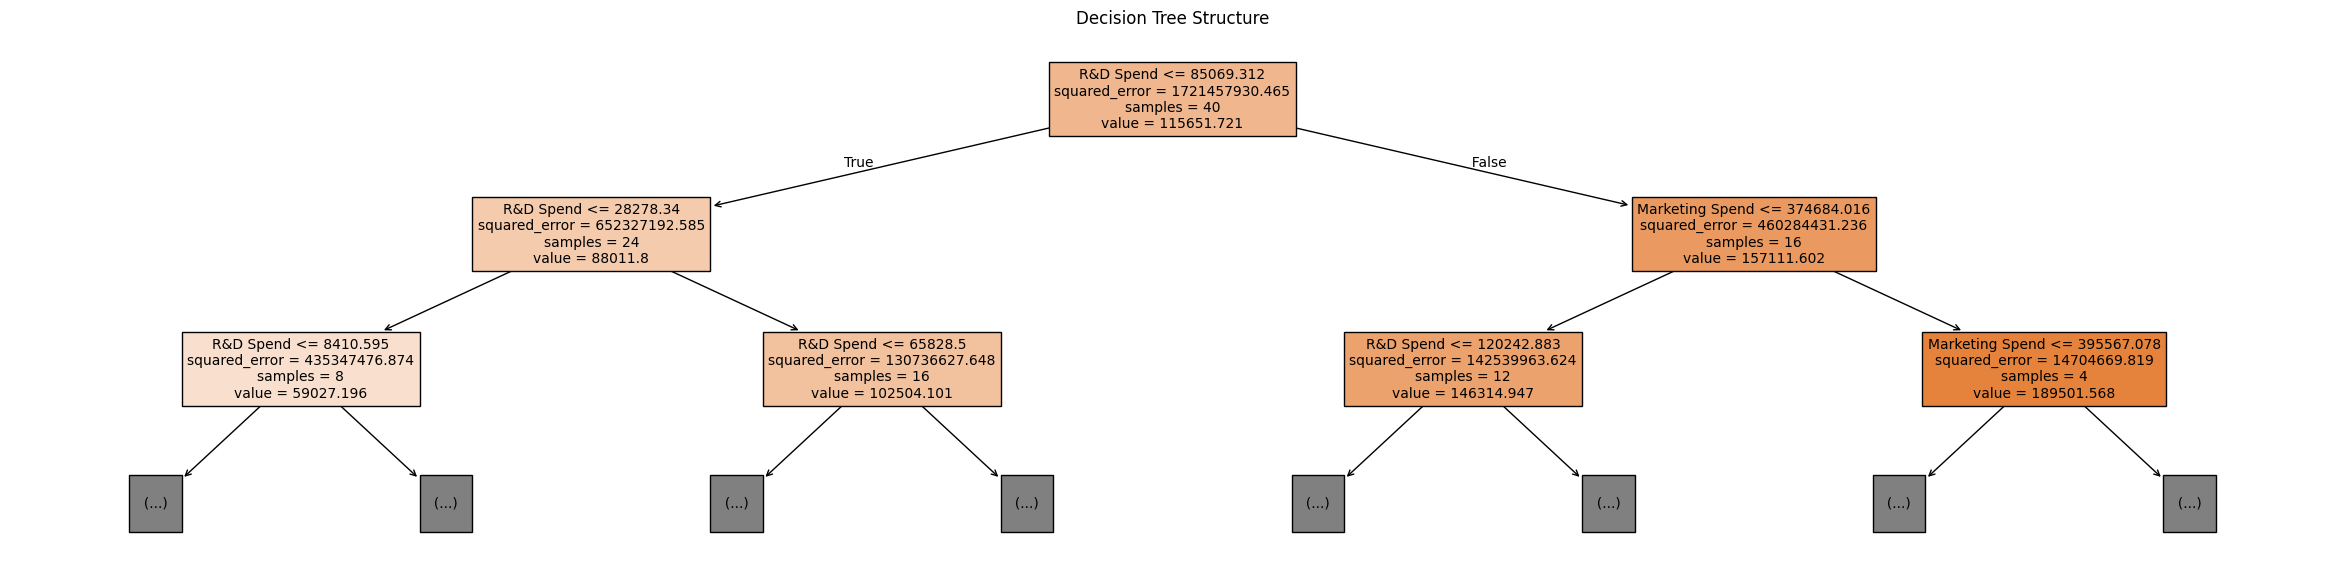

({'Mean Absolute Error': 11824.207999999997,
  'Mean Squared Error': 346190177.75854,
  'Symmetric Mean Absolute Percentage Error': np.float64(24.997823085970968),
  'Root Mean Squared Error': 18606.186545301,
  'r2_score': 0.572494978645292,
  'Mean Bias Error': 0.1777190315247704,
  'Mean Absolute Percentage Error': 0.17771903152477042},)

In [ ]:
#Decision Tree Regression
for_everything_except_lm_and_xgb(x_train, x_test, y_train, y_test, DecisionTreeRegressor)

In [ ]:
for_everything_except_lm_and_xgb(x_train, x_test, y_train, y_test, xgb.XGBRegressor)

({'Mean Absolute Error': 7450.425523437501,
  'Mean Squared Error': 89412571.44249564,
  'Symmetric Mean Absolute Percentage Error': np.float64(10.927491707304435),
  'Root Mean Squared Error': 9455.82209236699,
  'r2_score': 0.8895857660913647,
  'Mean Bias Error': 0.0976533077446298,
  'Mean Absolute Percentage Error': 0.0976533077446298},)